In [18]:
!pip --quiet install rpy2==3.5.1
!pip --quiet install scanpy

In [19]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv('/content/pcs_30_from_bayesSpace_top_2000_HVGs.csv')
df = df.set_index('Unnamed: 0')
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Unnamed: 0,,,,,,,,,,,,,,
7x15,-7.441131,-0.561991,-1.551163,1.797642,3.405955,3.165061,2.195388,1.066791,-0.414418,1.600567,0.505661,1.379709,1.828719,1.124380
7x16,-33.536438,-4.552305,-1.084444,1.959303,1.927931,2.503910,1.264458,-0.712239,-0.657437,1.249406,1.017060,0.553962,1.432043,1.035836
7x17,-33.419353,-4.187236,-0.130268,0.938894,1.368945,1.923064,0.329495,-0.344422,0.741183,1.579745,0.698595,0.065827,1.214577,1.689047
7x18,-29.867554,-5.068328,0.017066,0.694912,2.093198,2.214115,-0.152829,0.081894,-0.738653,0.510298,1.344869,-0.201212,1.021611,1.262486
8x13,-35.780982,-3.397238,0.214057,1.541695,2.284038,2.769298,0.372325,0.285953,-0.420590,1.672827,-0.258596,1.075055,1.995010,0.788229


In [28]:
def mclust_R(x, n_clusters, model='EEE', random_seed=2020):
    """\
    Clustering using the mclust algorithm.
    The parameters are the same as those in the R package mclust.
    """

    np.random.seed(random_seed)
    import rpy2.robjects as robjects
    # robjects.r('install.packages("mclust")')
    robjects.r.library("mclust")

    import rpy2.robjects.numpy2ri
    rpy2.robjects.numpy2ri.activate()
    r_random_seed = robjects.r['set.seed']
    r_random_seed(random_seed)
    rmclust = robjects.r['Mclust']

    res = rmclust(rpy2.robjects.numpy2ri.numpy2rpy(x), n_clusters, model)
    mclust_res = np.array(res[-2]).astype(int) - 1
    
    return mclust_res

In [29]:
out = mclust_R(df.values,3)

fitting ...
  |======================================================================| 100%


In [30]:
df_mclust_scribble = pd.DataFrame({'cluster.init':out},index=df.index.values)

In [31]:
df_mclust_scribble.head()

,cluster.init
7x15,0
7x16,0
7x17,0
7x18,0
8x13,0


In [32]:
df_mclust_scribble.to_csv('mclust_scribble.csv')

In [33]:
x_pixels = []
y_pixels = []

for spot in df_mclust_scribble.index:
    y_pixels.append(int(spot.split('x')[1]))
    x_pixels.append(int(spot.split('x')[0]))


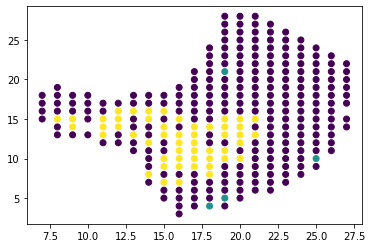

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x_pixels,y_pixels,c=df_mclust_scribble['cluster.init'].values)